In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
def sigmoid(w,b,range=10):
    """
    
    """
        
    f = lambda x : 1/(1+np.exp(-x))
    x = np.linspace(-range,range)
    x = np.array([x,x]).T
    z = np.array( [ np.array(w).dot(i)+b for i in x])
    result = np.array([f(i) for i in z])
    return z,result

def error_0(x):
       return  -np.log(1-x)
    
def error_1(x):
      return -np.log(x)


# Investigation of cross-entropy function. 
## Math solving of optimization problem related to Binary Logistic Regression  . 

### author: daodeiv 

<h7>
    <font color='#255e5c'>
Suppose we have a generic training set N: <br>
$$N={(x^{1},y^{1}),(x^{2},y^{2}),(x^{3},y^{3}),...,(x^{m},y^{m})}$$ <br>
made of m training examples where $ (x^{1},y^{1})$ is the first example and so on.More specificaly $x^{m}$ is the m-th imput variable of m ,while $y^{m}$ is its output,traget or label variable .Being this classification every output variable $y^{m}$
is bound between {0,1}. $y \in [0,1]$.
    </font>
    
 

<font color='#255e5c'>
Each example $x^{n}$ is represented as usual by its feature vector
$$ \vec{x} =\quad  \begin{bmatrix}   x_0 \\ x_1 \\ ... \\ x_n\end{bmatrix}\quad  $$
where $x_0 = 1$ always .This generic example we don't know the exact  number of feature .Finaly we have a hypotesis function of logistic regresion ,matematicaly written as :
 </font>  
 <font color='#253cba'>
   <br> 
 $$h_{\theta}(\vec{x})= \frac{1}{1+e^{-\vec{\theta}.\vec{X}}}=\frac{1}{1+e^{-\theta^T.X}}$$
 <br>
 </font>
 <font color='#255e5c'>
 $h_{\theta}(X)$ is also called sigmoid function ,graphicaly look like this :
 </font>

Text(0.5, 1.0, 'SIgmoid')

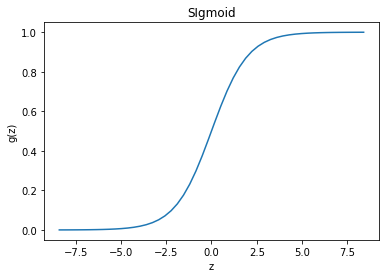

In [4]:
x,y = sigmoid([0.001,0.004],0.0008,range=1680)
plt.plot(x,y)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('SIgmoid')

<h7>
    <font color='#255e5c'>
The most important property is that the sigmoid transforms every variable belongs $x\in [- \infty,\infty]$ into variable 
belong to interval $y\in [0,1]$. <br>
That property makes the sigmoid function extremely convenient function for binary classification problems.<br>
The logistic regression deals with finding the best parameters $\Theta s = \Theta_0,\Theta_1,..,\Theta_m $ according to given data using some appropriative Loss function.     
        
The loss function for sigmoid look likes :        
 

<font>
 <font color='#253cba'>   
$$ (1) \; \;  Loss(h_{\Theta}(x),y) = \Bigg( \begin{matrix}  -log(h_{\Theta}(x)) && if\; y=1 \\log( 1 - h_{\Theta}(x)) && if\; y=0\end{matrix}\Bigg)  $$ 
    </font> 
</h7>


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


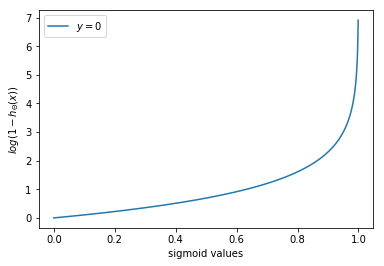

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


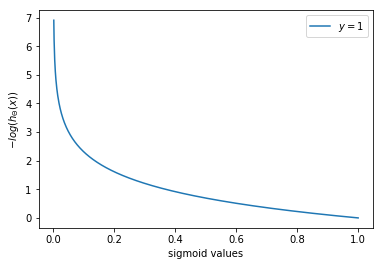

In [5]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values))
plt.xlabel('sigmoid values')
plt.ylabel(r'$log(1 - h_{\Theta}(x))$')
plt.legend()
plt.show()
plt.plot(sigmoid_values, error_1(sigmoid_values))
plt.ylabel(r'$-log(h_{\Theta}(x))$')
plt.xlabel('sigmoid values')
plt.legend()
plt.show()

<h7>
    <font color='#255e5c'>
   The eq.(1) can be written in more compact form :      
   </font>  
     <br> <br>
</h7>    
<h5>
    <font color='#253cba'>
    $$ Loss(h_{\Theta}(x),y) = -y.log(h_{\Theta}(x)) - (y-1)log(1 - h_{\Theta}(x))$$ 
   </font>   
    </h5>

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


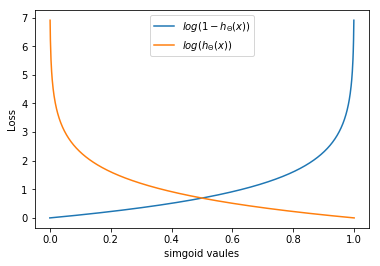

In [22]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values), label = r'$log(1 - h_{\Theta}(x))$')
plt.xlabel('simgoid vaules')
plt.ylabel('cost')
plt.legend()
plt.plot(sigmoid_values, error_1(sigmoid_values), label = r'$log(h_{\Theta}(x))$')
plt.xlabel('simgoid vaules')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h7>
    <font color='#255e5c'>
    The above graphic is called a cross-entropy function. <br>
    Before we are going to get a meaning of function using graphics we will see other interpretations of cross-entropy also known as Log-Likelihood coming from probabilistic theory. <br> <br>
    Let us regard  the value of $h_{\Theta}(x)$ as probability: <br>
        $$ \begin{matrix}
P(y=1|x,\Theta) = h_{\Theta}(x)  \\
P(y=1|x,\Theta) = 1-h_{\Theta}(x)
\end{matrix}\;\; =\; P(y|x;\Theta)=h_{\Theta}^y(1-h_{\Theta}(x))^{1-y}$$ 
<br>
So the likehood is:
    $$L(\Theta) = p(y|X;\Theta) = $$ <br>
    $$\;\;\;\;\;\;\;\;\;\;\;= \prod_{i=1}^{m}p(y^{(i)}|x^{(i)};\Theta) $$
    $$\;\;\;\;\;\;\;\;\;\;\;= \prod_{i=1}^{m}h_{\Theta}(x^{(i)})^{y^{i}}(1-h_{\Theta}(x))^{1-y^{(i)}}$$
   And the log likehood:
      $$ log(L(\Theta))=\sum_i^my_i.log(h_{\Theta}(x_i)) + (y_i-1)log(1 - h_{\Theta}(x_i))$$
   The above euation is called likelihood or cross entropy.<br>
   Likehood is use for  Cost function in Logistic regression.
</font>  
</h7>        

<h4>
    <font color='#253cba'>
  $$ (2) \; \;J(\Theta) = \sum_i^mCost(h_{\Theta}(x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(h_{\Theta}(x_i)) + (y_i-1)log(1 - h_{\Theta}(x_i))\big)$$
  </font>
</h4>  
<h7>
    <font color='#255e5c'>
Let make an attempt to understand why the minimization of the above equation could be succesfuly use to find the best parameters $\theta_i $ 

   </font>
</h7>  

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


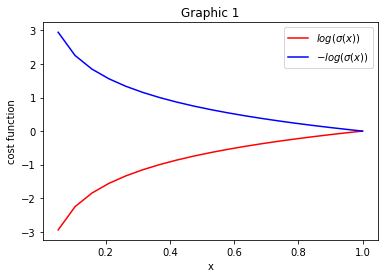

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Graphic 2')

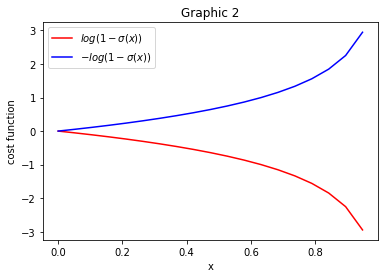

In [6]:
x = np.linspace(0,1,20)
y = np.log(x)
y1 = -np.log(x) 

plt.plot(x,y,color='red',label=r'$log(\sigma(x))$')
plt.plot(x,y1,color='blue',label=r'$-log(\sigma(x))$')
plt.xlabel("x")
plt.ylabel("cost function")
plt.title('Graphic 1')
plt.legend()
plt.show()

y = np.log(1-x)
y1 = -np.log(1-x) 

plt.plot(x,y,color='red',label=r'$log(1- \sigma(x))$')
plt.plot(x,y1,color='blue',label=r'$-log(1- \sigma(x))$')
plt.xlabel("x")
plt.ylabel("cost function")
plt.legend()
plt.title('Graphic 2')

<h5>
    <font color='B233FF'>
  How we can find the min entropy ? What does mean min entropy ?
  </font>
</h5>  
  

  ##### from  graphic 1 we can see :
  <br>
  <h5>
    <font color='#253cba'>
  $$ (3) \; \; \; x \to 1 \; then \; -log(\sigma(x)) \to 1 $$ 
  $$ (4) \; \; \; x \to 1 \; then \; -log(\sigma(x)) \to 1 \;    $$
  <br> <br>
   $$(5) \; \; \;x \to 0 \; then \; log(\sigma(x)) \to \infty $$
  $$ (6) \; \; \;x \to 0 \; then \;  -log(\sigma(x)) \to -\infty $$ </br>
</h5>  
<h7>
    <font color='#255e5c'>
From eq. (3) we could conclude that when we have to fit the estimators($\theta_i$) values to label(target) ones which take value either 1 or 0 then eq. $-log(\sigma(x))$must minimize.<br> 
        In such a way, the min error(min loss) which refer to min-entropy will be achieved in case when the target value is equal to 1. <br>
        if we use eq.(4) we have to  maximize a $log(\sigma(x))$ this will give the min-entropy and min error as well but $log(\sigma(x))$ has not a closed-form, therefore the finding the extremums is a difficult task.When the target value is 0 the both functions $log(1−σ(x)),−log(1−σ(x))$ are useless, because they tend to infinity  $−log(1−σ(x)),−log(1−σ(x))→+−∞$ and  $error→+−∞$  and entropy do the same , since they also have a closed-form
  </font>
</h7> 




##### from  graphic 2 we can see :
<br>
 <h5>
    <font color='#253cba'>
 $$ (7) \; \; \; x \to 1 \; then \; -log(1-\sigma(x)) \to \infty $$ 
  $$ (8) \; \; \; x \to 1 \; then \; -log(1-\sigma(x)) \to \infty;    $$ <br> <br><br>
    $$(9) \; \; \;x \to 0 \; then \; \;log(1-\sigma(x)) \to 0 $$
  $$ (10) \; \; \;x \to 0 \; then \; \; -log(1-\sigma(x)) \to 0 $$ </br>
</h5>  
 <h7>
  <font color='#255e5c'>
The above thoughts can be taken into account for eq. (7)(8)(9)(10) as well, but with the opposite logic, when the target value is equal to 0 then  the best choice is $-log(1-\sigma(x))$ because it has closed-form tends to 0 not to infinity. <br> <br>
   
   We've assumed that why the minimization of eq (2) will give the min error equivalented to min-entropy.
  </font>
</h7>       

 <h7>
    <font color='#255e5c'>
  In briefly, we saw why the function  $-log(\sigma(x))$ can be use for cost-error when the  target value is equal to 1 and  $-log(1-\sigma(x))$ for a target value is equal to 0and how both elegantly could be part of one  equation. <br> <br>
        
  </font>   
  <font color='#253cba'>
        $$ Cost(h_{\Theta}(x),y) = -y.log(h_{\Theta}(x)) - (y-1)log(1 - h_{\Theta}(x))$$ 
   </font>  
       
       
</h7>    

<h7>
    <font color='#255e5c'> 
        The next step is how we can minimize: $$ Cost(h_{\Theta}(x),y)$$ where <br> 
        $$ h_{\theta(x)}=\sigma(\vec{\theta}.\vec{x})=\frac{1}{1+e^{\vec{\theta}.\vec{x}}}=\frac{1}{1+e^{z}}$$ <br>  <br> in order 
        to   find the best estimators  $\vec{\Theta} = [\theta_n ,..., \theta_1 ,\theta_0]$
    </font>
</h7>    

### Optimization problem
<br>
<h7>
    <font color='#255e5c'> 
   Let's dive into mathematics behind minimization of cross-entropy.<br><br>
We will use the well known Gradient denscent for minimization in order to find:
<br> <br>
$$\frac{\partial J(\Theta)}{\partial x_i}$$
 <br> <br>
   where 
          $$ J(\Theta) = \sum_i^mCost(h_{\Theta}(x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(h_{\Theta}(x_i)) + (1-y_i)log(1 - h_{\Theta}(x_i))\big)$$
    </font>
</h7>            

<h7>
    <font color='#255e5c'> 
     First, let to find some derivatives of function that are from an ultimate need.
    </font>
</h7>    

<h2>
    <font color='#253cba'>
  $(1)\;\;\;\;\; \frac{\partial h_{\Theta(z)}}{\partial x_i } = \frac{d h_{\Theta(z)}}{dz}.\frac{\partial z}{\partial x_i}  $
  <br> <br>
  $(2)\;\;\;\;\; \frac{d h_{\Theta(z)}}{dz} = \frac{\frac{1}{1+e^{-z}}}{dz}$
  
  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;= \frac{e^{-z}}{(1+e^{-z})^2}$
   <br>
  
   
  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\frac{1}{1+e^{-z}}(1 -\frac{1}{1+e^{-z}} ) $ 
  <br> <br>
  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;= h_{\Theta}(z)(1 - h_{\Theta}(z))  $
  
  <br> <br>
  
  $ (3) \; \; \frac{d(log(h_{\Theta}(x_i)))}{dz} = \frac{1}{h_{\Theta}(z)}\frac{dh_{\Theta}(z))}{dz}$ <br>
 <br> <br>
 $by\; plugin \;the\; eq.\;(2)\;$ <br> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\frac{1}{h_{\Theta}(z)} h_{\Theta}(z)(1 - h_{\Theta}(z))$ <br>


 <br> <br>

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=( 1 - h_{\Theta}(z) ) $
<br> <br> <br> <br>
$ (4)\;\;\;\;\; \frac{dlog(1 - h_{\Theta}(z))}{dz} = \frac{1}{(1- h_{\Theta}(z))}\frac{d(1-h_{\Theta}(z)))}{dz}$
<br> <bR>

$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \frac{1}{(1- h_{\Theta}(z))}\frac{-d(h_{\Theta}(z)))}{dz}$
 <br> <br>
 $by\; plugin \;the\; eq.\;(3)\;$ <br> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=-\frac{1}{(1-h_{\Theta}(z))} h_{\Theta}(z)(1 - h_{\Theta}(z)) $ <br> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=- h_{\Theta}(z)) $ 
   </font>
</h2>   






<br>
<h7>
    <font color='#255e5c'> 
Let to find partial derivate of function  $J(\Theta)$ respect to $x_i$ <br>
 </font>
</h7>  
<h2>
    <font color='#253cba'>
       
<br>$(5) \; \; \dot{J}(\theta)_{\theta_i}=\frac{\partial J(\theta)}{\partial \theta_i} =   -\frac{1}{m}\sum_i^m\big(y_i \frac{\partial log(h_{\Theta}(z))}{\partial \theta_i}+  (1-y_i) \frac{\partial log(h_{\Theta}(z)-1)}{\partial \theta_i}\big) = $ <br> <br>
$-\frac{1}{m}\sum_i^m\big(y_i \frac{dlog(h_{\Theta}(z))}{dz}\frac{\partial z}{\partial \theta_i}+  (y_i-1) \frac{dlog(1- h_{\Theta}(z))}{dz}\frac{\partial z}{\partial \theta_i}\big)   $
   </font>
</h2>   
        
           


<br>
<h7>
    <font color='#255e5c'> 
appling  eqations (3) (4) to (5)  we achieve <br>
 </font>
</h7>  
<h2>
<font color='#253cba'>
$(6)\;\dot{J}(\theta)_{.\theta_i}=-\frac{1}{m}\sum_i^m\big(y_i (1 - h_{\Theta}(z))\frac{\partial z}{\partial .\theta_i}+  (1-y_i) (- h_{\Theta}(z))\frac{\partial z}{\partial x_i})\big) $
    <br> <br>
$\;\;\;\;\;\;\;\;\;\;=-\frac{1}{m}\sum_i^m\big(y_i\frac{\partial z}{\partial x_i} -y_ih_{\Theta}(z))\frac{\partial z}{\partial \theta_i} +y_ih_{\Theta}(z))\frac{\partial z}{\partial \theta_i} - h_{\Theta}(z)\frac{\partial z}{\partial \theta_i})  $
<br> <br>
$\;\;\;\;\;\;\;\;\;\;= -\frac{1}{m}\sum_i^m \big(y_i \frac{\partial z}{\partial \theta_i} - h_{\Theta}(z)\frac{\partial z}{\partial \theta_i}\big) $
<br> <br>
$\;\;\;\;\;\;\;\;\;\;=  -\frac{1}{m}\sum_i^m \big(y_i  - h_{\Theta}(z)\big)\frac{\partial z}{\partial \theta_i}  $
<br> <br>
$where$
<br><br>    
$$ (7) \;\frac{\partial z}{\partial \theta_i}=\frac{\partial \theta_n x_n + ...\theta_1 x_1+\theta_0}{\partial \theta_i } = x_i $$ 
<br> <br>
$and \; \; for\;\; x_0=1\;\; \frac{\partial z}{\partial \theta_0} =1 $ <br>
<br>
$applying \;eq.(7) \;in \; eq.(6)\; we\; will\; achieve :$
</h2>
<br><br>
<h1>
  <font color='#253cba'> 
      $$(8)\; \; \frac{\partial J(\theta)}{\partial \theta_i} =-\frac{1}{m}\sum_i^m \big(y_i - h_{\Theta}(z)\big )x_i $$
     
 </font>
</h1>    
  


  <br>
<h5>
    <font color='#255e5c'> 
  Gradient descent algorithm using eq.(8) mathematically will be:
 </font>
</h5> 

<h2>
<font color='#253cba'>
$ 13) \; \; \theta_i = \theta_i - \frac{\partial J(\theta)}{\partial a} $ <br> <br>
<br> <br>
$\; \;\; \; \; \;\; \; \; = \theta_i - (-\frac{1}{m}\sum_i^m \big(y_i  - h_{\Theta}(z)\big )x_i)  $ <br>
<br> <br>
$\; \; \; \; \; \; \; \; = \theta_i - \frac{1}{m}\sum_i^m \big( h_{\Theta}(z) - y_i\big )x_i $ <br> <br>
</font>
</h2>



<h3>
    <font color='#255e5c'> 
        Our gradient descent algorithm is : 
     </font>
</h3>    
<h1>
   
 <br>
  <font color='#6600cc'> 
      $$\theta_i = \theta_i - \frac{1}{m}\sum_i^m \big( h_{\Theta}(z) - y_i\big )x_i $$
  </font>
 
 <br>
<h1>
    <h3>
    <font color='#255e5c'> 
        for intersept $\theta_0$ :
     </font>
</h3> 
  <h1>
  <font color='#6600cc'> 
      $$\theta_0 = \theta_0 - \frac{1}{m}\sum_i^m \big( h_{\Theta}(z) - y_i\big )$$
  </font>
</h1>  
      
        